## Time series data for weather

www.ncei.noaa.gov

In [1]:
import pandas as pd
import requests

In [2]:
!ls

DCplants20162017.csv         nyc_taxi
ERCOT_op.csv                 nyc_taxi_2017.csv
README.md                    nyiso_2016.csv
SCL_op.csv                   nyiso_2017.csv
create_db.ipynb              nyiso_load
decompose.ipynb              nyiso_load_2017.csv
eia860                       nyiso_price
eia861                       nyiso_price_2017.csv
eia923                       other_projects
forecast_nyiso_2016_2017.csv plantid3845.csv
forecastplantid3845.csv      plantid50187.csv
forecastplantid50187.csv     plantid54268.csv
forecastplantid54268.csv     prediction_model.ipynb
import_data.ipynb            read_nyctaxi_data.ipynb
import_json_file.ipynb       read_nyiso_data.ipynb
la_guardia_airport.txt       read_price_data.ipynb
la_guardia_airport_2017.csv  read_weather_data.ipynb
multivariate_nn_model.ipynb  time_series_resource
nn_model.ipynb


In [3]:
url = 'http://www.ncdc.noaa.gov/orders/isd/6303677539041dat.txt'

In [18]:
resp = requests.get(url)

In [19]:
#df_hourly = pd.read_csv(resp.text)
with open('la_guardia_airport.txt', 'w') as f:
    f.write(resp.text)

In [4]:
df_hourly = pd.read_table('la_guardia_airport.txt', 
                          delim_whitespace = True, 
                          parse_dates=['YR--MODAHRMN'],
                          dtype = {'TEMP':np.float64},
                          na_values ='****')

In [7]:
df_hourly.tail()

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
221785,725030,14732,2018-01-20 20:51:00,250,20,25,250,***,*,*,...,1012.2,29.89,1011.1,***,***,0.00,*****,*****,*****,**
221786,725030,14732,2018-01-20 21:00:00,250,20,***,***,BKN,*,*,...,1012.2,*****,1010.8,***,***,*****,*****,*****,*****,**
221787,725030,14732,2018-01-20 21:51:00,270,15,***,250,***,*,*,...,1013.0,29.92,1012.1,***,***,0.00,*****,*****,*****,**
221788,725030,14732,2018-01-20 22:51:00,260,13,23,250,***,*,*,...,1014.0,29.94,1012.8,***,***,0.00,*****,*****,*****,**
221789,725030,14732,2018-01-20 23:51:00,270,14,***,250,***,*,*,...,1014.8,29.97,1013.8,54,48,0.00,*****,*****,*****,**


In [8]:
df_hourly.shape

(221790, 33)

In [9]:
df_hourly.columns

Index(['USAF', 'WBAN', 'YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L',
       'M', 'H', 'VSB', 'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2',
       'AW.3', 'W', 'TEMP', 'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01',
       'PCP06', 'PCP24', 'PCPXX', 'SD'],
      dtype='object')

In [10]:
df2017_hourly = df_hourly.loc[(df_hourly.loc[:,'YR--MODAHRMN'] >= pd.datetime(2017, 1, 1)) 
                              & (df_hourly.loc[:,'YR--MODAHRMN'] < pd.datetime(2018, 7, 1)),
                              ['YR--MODAHRMN', 'TEMP']]

In [11]:
df2017_hourly.shape

(14770, 2)

In [12]:
df2017_hourly.dropna(inplace = True)

In [13]:
df2017_hourly.shape

(14366, 2)

In [14]:
df2017_hourly.head(30)

,YR--MODAHRMN,TEMP
207020,2017-01-01 00:51:00,44.0
207021,2017-01-01 01:51:00,44.0
207022,2017-01-01 02:51:00,44.0
207023,2017-01-01 03:51:00,45.0
207024,2017-01-01 04:51:00,45.0
207026,2017-01-01 05:51:00,46.0
207027,2017-01-01 06:51:00,45.0
207028,2017-01-01 07:51:00,46.0
207029,2017-01-01 08:51:00,46.0
207030,2017-01-01 09:51:00,47.0


In [15]:
df2017_hourly.set_index('YR--MODAHRMN', inplace = True)

In [16]:
df2017_output = df2017_hourly.resample('1H').mean()

In [17]:
df2017_output.shape

(9240, 1)

In [18]:
df2017_output.reset_index(level=0, inplace=True)

In [19]:
df2017_output.columns = ['time_stamp', 'temp']

In [20]:
df2017_output.head()

,time_stamp,temp
0,2017-01-01 00:00:00,44.0
1,2017-01-01 01:00:00,44.0
2,2017-01-01 02:00:00,44.0
3,2017-01-01 03:00:00,45.0
4,2017-01-01 04:00:00,45.0


In [21]:
df2017_output.to_csv('la_guardia_airport_2017.csv', index = False)

In [22]:
df2017_hourly.dtypes

TEMP    float64
dtype: object

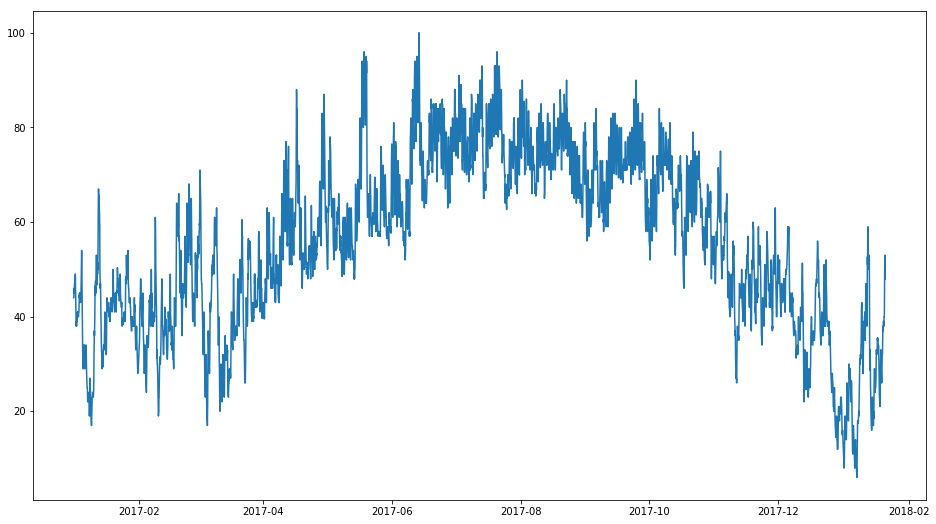

In [26]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(df2017_output.loc[:,'time_stamp'], df2017_output.loc[:, 'temp'])

### Data by Day

In [6]:
df_input = pd.read_csv('https://www.ncei.noaa.gov/orders/cdo/1188581.csv', parse_dates = ['DATE'])

In [7]:
df_input.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,...,WT16,WT16_ATTRIBUTES,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-01,11.18,",,W",615.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-02,6.26,",,W",959.0,",,X",...,1.0,",,0",NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-03,10.07,",,W",1209.0,",,X",...,NaN,NaN,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-04,7.61,",,W",13.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-05,6.93,",,W",1023.0,",,X",...,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_input.shape

(3304, 66)

In [9]:
df_input.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'FMTM', 'FMTM_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES',
       'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD',
       'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES',
       'TMIN', 'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_ATTRIBUTES', 'WDF2',
       'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2', 'WSF2_ATTRIBUTES',
       'WSF5', 'WSF5_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT02',
       'WT02_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES',
       'WT06', 'WT06_ATTRIBUTES', 'WT07', 'WT07_ATTRIBUTES', 'WT08',
       'WT08_ATTRIBUTES', 'WT09', 'WT09_ATTRIBUTES', 'WT11', 'WT11_ATTRIBUTES',
       'WT13', 'WT13_ATTRIBUTES', 'WT14', 'WT14_ATTRIBUTES', 'WT16',
       'WT16_ATTRIBUTES', 'WT17', 'WT17_ATTRIBUTES', 'WT18', 'WT18_ATTRIBUTES',
       'WT19', 'WT19_ATTRIBUTES', 'WT22', 'WT22_ATTRIBUTES'],
      dtype='object')

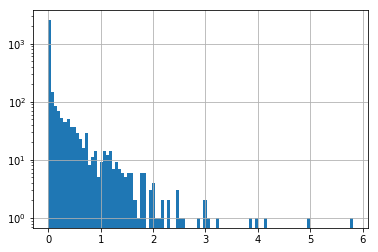

In [13]:
df_input.PRCP.hist(bins = 100, log = True)

In [19]:
df_input.PRCP_ATTRIBUTES.unique(), df_input.SNOW_ATTRIBUTES.unique()

(array([',,0,2400', 'T,,0,2400', ',,X,2400', 'T,,X,2400', ',,Z,2400',
        ',,W,2400', 'T,,W,2400'], dtype=object),
 array([',,0,', 'T,,0,', ',,X,', 'T,,X,', ',,Z,', ',,W,', 'T,,W,',
        ',,W,2400', 'T,,W,2400', nan], dtype=object))

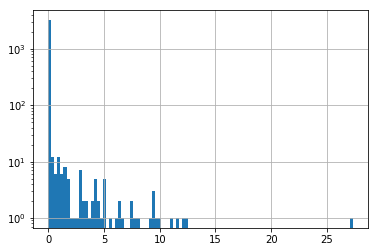

In [18]:
df_input.SNOW.hist(bins = 100, log = True)

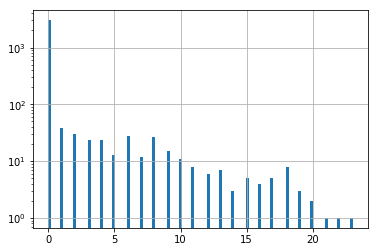

In [17]:
df_input.SNWD.hist(bins = 100, log = True)

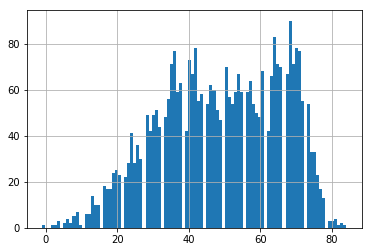

In [22]:
df_input.TMIN.hist(bins = 100)

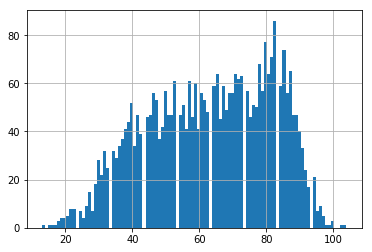

In [23]:
df_input.TMAX.hist(bins = 100)

In [25]:
df_input.TSUN.unique()

array([ nan,   0.])

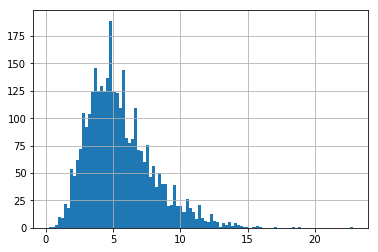

In [26]:
df_input.AWND.hist(bins = 100)

In [27]:
df_use = df_input.loc[:,['DATE', 'AWND', 'PRCP', 'SNWD', 'TMIN', 'TMAX']]

In [29]:
df_use.head()

,DATE,AWND,PRCP,SNWD,TMIN,TMAX
0,2009-01-01,11.18,0.0,0.0,15,26
1,2009-01-02,6.26,0.0,0.0,23,34
2,2009-01-03,10.07,0.0,0.0,29,38
3,2009-01-04,7.61,0.0,0.0,25,42
4,2009-01-05,6.93,0.0,0.0,38,43


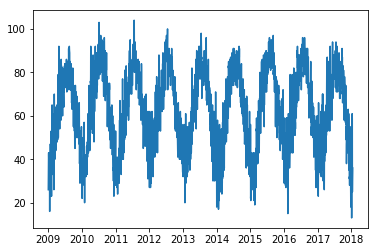

In [34]:
plt.plot(df_use.iloc[:, 0], df_use.iloc[:, 5])

In [35]:
df_use.to_csv('central_park_weather.csv', index = False)